In [51]:
import matplotlib as mpl
import tensorflow as tf
%matplotlib inline
import numpy as np
import sklearn 
import os
import sys
import time
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.18.1
pandas 0.25.3
sklearn 0.22.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()

In [68]:
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


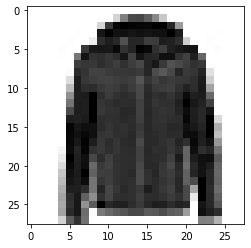

In [69]:
#显示单张图片
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()
     
    
show_single_image(x_train[0])

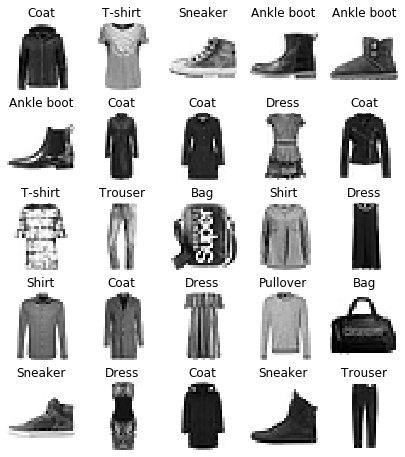

In [70]:
def show_images(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)#用于判断一个表达式，在表达式条件为 false 的时候触发异常
    assert n_rows * n_cols < len(x_data)
    
    plt.figure(figsize=(n_cols * 1.4,n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row +col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation='nearest')
            plt.axis('off')#坐标系去掉
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_images(5,5,x_train,y_train,class_names)

In [82]:
#tf.keras.model.Sequential()

# model = keras.models.Sequential()
# # 网络的第一层tf.keras.layers.Flatten将图像格式从二维数组（28 x 28像素）转换为一维数组（28 * 28 = 784像素）。
# # 可以将这一层看作是堆叠图像中的像素行并对齐它们。该层没有学习参数。它只会重新格式化数据。
# model.add(keras.layers.Flatten(input_shape=(28,28)))
# model.add(keras.layers.Dense(300,activation='relu'))#全连接层
# model.add(keras.layers.Dense(100,activation='relu'))
# model.add(keras.layers.Dense(10,activation='softmax'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')     
])



# relu: y = max(0,x)
# softmax：将向量变成概率分布 x = [x1,x2,x3],
#       y = [e^x1/sum,e^x2/sum,e^x3/sum],sum=[e^x1 + e^x2 + e^x3]
# reason for sparse : y->index,y->one_hot->[]


# 损失函数 -衡量训练期间模型的准确性。您希望最小化此功能，以在正确的方向上“引导”模型。
# 优化器 -这是基于模型看到的数据及其损失函数来更新模型的方式。
# 指标 -用于监视培训和测试步骤。以下示例使用precision，即正确分类的图像比   例。


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [83]:
model.layers

In [84]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_27 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [85]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 61us/sample - loss: 2.5584 - accuracy: 0.7028 - val_loss: 0.6794 - val_accuracy: 0.7406
Epoch 2/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.6193 - accuracy: 0.7641 - val_loss: 0.5509 - val_accuracy: 0.8104
Epoch 3/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.5322 - accuracy: 0.7994 - val_loss: 0.5506 - val_accuracy: 0.7902
Epoch 4/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4702 - accuracy: 0.8301 - val_loss: 0.4416 - val_accuracy: 0.8358
Epoch 5/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4333 - accuracy: 0.8443 - val_loss: 0.4390 - val_accuracy: 0.8500
Epoch 6/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4138 - accuracy: 0.8539 - val_loss: 0.3995 - val_accuracy: 0.8682
Epoch 7/10
55000/55000 [==============================] -

In [86]:
type(history)

tensorflow.python.keras.callbacks.History

In [87]:
history.history

{'loss': [2.558438320203261,
  0.6193301573319868,
  0.5321576433918693,
  0.4701967080116272,
  0.43328195872306824,
  0.4137564414717934,
  0.39069603320468554,
  0.3804193911444057,
  0.3651945475166494,
  0.35935806659785186],
 'accuracy': [0.7027818,
  0.7640727,
  0.7993636,
  0.8300909,
  0.84434545,
  0.85385454,
  0.86005455,
  0.86414546,
  0.8685091,
  0.87134546],
 'val_loss': [0.6794050098896026,
  0.5509086158752441,
  0.5505681624412536,
  0.4416452134609222,
  0.4390311400175095,
  0.3995444781780243,
  0.42062141482830046,
  0.4112229868173599,
  0.38622303948402403,
  0.4036541936635971],
 'val_accuracy': [0.7406,
  0.8104,
  0.7902,
  0.8358,
  0.85,
  0.8682,
  0.8534,
  0.854,
  0.8706,
  0.8642]}

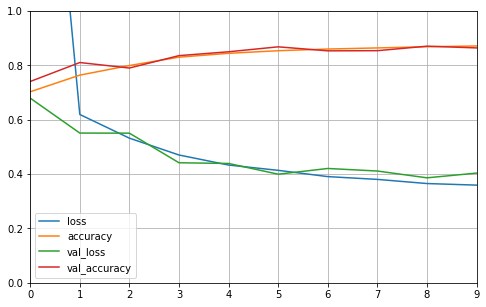

In [88]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)